# A  Sentiment Analysis of Elon Musk's Takeover of Twitter

Load datasets

In [1]:
import csv
import pandas
import nltk
import string
import re
import spacy
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

twittertakeover_raw = pandas.DataFrame(pandas.read_csv("C:\\Users\\skyha\\Documents\\school stuff\\AIT526\\final project datasets\\twittertakeover.csv"))
elonmusktwitter_raw = pandas.DataFrame(pandas.read_csv("C:\\Users\\skyha\\Documents\\school stuff\\AIT526\\final project datasets\\elonmusktwitter.csv"))
riptwitter_raw = pandas.DataFrame(pandas.read_csv("C:\\Users\\skyha\\Documents\\school stuff\\AIT526\\final project datasets\\riptwitter.csv"))
thankyouelonmusk_raw = pandas.DataFrame(pandas.read_csv("C:\\Users\\skyha\\Documents\\school stuff\\AIT526\\final project datasets\\ThankYouElonMusk.csv"))

Remove bot tweets

In [2]:
not_bot_sources = ["Twitter for iPhone", "Twitter for Android", "Twitter Web App", "Twitter for iPad", 
                   "Flamingo for Android", "Twitterrific for Mac", "Twitterrific for iOS",
                  "Twitter Web Client", "Birdie for Twitter", "tweetcaster for Android", "Twitter Media Studio",
                  "TwitPaine for Android"]

twittertakeover = twittertakeover_raw[twittertakeover_raw['Source of Tweet'].isin(not_bot_sources)]
elonmusktwitter = elonmusktwitter_raw[elonmusktwitter_raw['Source of Tweet'].isin(not_bot_sources)]
riptwitter = riptwitter_raw[riptwitter_raw['Source of Tweet'].isin(not_bot_sources)]
thankyouelonmusk = thankyouelonmusk_raw[thankyouelonmusk_raw['Source of Tweet'].isin(not_bot_sources)]

Convert the list to a string

In [3]:
def list_to_string(data):
    data_tweet = data["Tweet"]
    line_count = 0
    processed_string = ""
    for row in data_tweet:
        if line_count >= 0:
            processed_string = processed_string + " " + row
            line_count += 1
    print(f'Processed {line_count} lines. \n')
    return processed_string

In [4]:
twittertakeover_text = list_to_string(twittertakeover)
elonmusktwitter_text = list_to_string(elonmusktwitter)
riptwitter_text = list_to_string(riptwitter)
thankyouelonmusk_text = list_to_string(thankyouelonmusk)

Processed 11973 lines. 

Processed 9521 lines. 

Processed 6825 lines. 

Processed 1242 lines. 



Remove Hashtags

In [5]:
# Remove URLs, hashtags, and @users before tokenizing

#elonmusktwitter_text = re.sub(r"\S*\#.*?(?=\s)", "", elonmusktwitter_text, flags=re.MULTILINE)
#riptwitter_text = re.sub(r"\S*\#.*?(?=\s)", "", riptwitter_text, flags=re.MULTILINE)
#thankyouelonmusk_text = re.sub(r"\S*\#.*?(?=\s)", "", thankyouelonmusk_text, flags=re.MULTILINE)
#twittertakeover_text = re.sub(r"\S*\#.*?(?=\s)", "", twittertakeover_text, flags=re.MULTILINE)

#' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",elonmusktwitter_text).split())
#' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",riptwitter_text).split())
#' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",thankyouelonmusk_text).split())
#' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",twittertakeover_text).split())

elonmusktwitter_text = re.sub("@[A-Za-z0-9_]+","", elonmusktwitter_text)
elonmusktwitter_text = re.sub("#[A-Za-z0-9_]+","", elonmusktwitter_text)

riptwitter_text = re.sub("@[A-Za-z0-9_]+","", riptwitter_text)
riptwitter_text = re.sub("#[A-Za-z0-9_]+","", riptwitter_text)

thankyouelonmusk_text = re.sub("@[A-Za-z0-9_]+","", thankyouelonmusk_text)
thankyouelonmusk_text = re.sub("#[A-Za-z0-9_]+","", thankyouelonmusk_text)

twittertakeover_text = re.sub("@[A-Za-z0-9_]+","", twittertakeover_text)
twittertakeover_text = re.sub("#[A-Za-z0-9_]+","", twittertakeover_text)

## 1. Process from Lab1

#### Process for the hashtag "twittertakeover"

Tokenizing

In [6]:
# Tokenize the text
from nltk.tokenize import sent_tokenize,word_tokenize

# Remove URLs before tokenizing
twittertakeover_text = re.sub(r"\S*http.*?(?=\s)", "", twittertakeover_text, flags=re.MULTILINE)

sentToken = sent_tokenize(twittertakeover_text)
wordToken = word_tokenize(twittertakeover_text)

print("# of sentences:", len(sentToken))
print("# of words after tokenizing:", len(wordToken))
print(wordToken[:20])

# of sentences: 8633
# of words after tokenizing: 161720
['Make', 'sure', 'to', 'check', 'out', 'our', '1st', 'ever', 'Sunday', 'review', 'at', '6', 'pm', 'only', 'on', 'Twitter', 'is', 'so', 'fun', 'right']


The text is divided by sentences and words using nltk.tokenize library. It shows first 20 words in wordToken list.

In [7]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(twittertakeover_text.lower())
print("# of words after punctuation removing:", len(words))
print(words[:20])

# of words after punctuation removing: 140675
['make', 'sure', 'to', 'check', 'out', 'our', '1st', 'ever', 'sunday', 'review', 'at', '6', 'pm', 'only', 'on', 'twitter', 'is', 'so', 'fun', 'right']


All letters become lower cases. All special characters and punctuation are removed by using RegexpTokenizer. Now, all words are in lower cases and the list does not contain special characters or punctuation. 

In [8]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
filtered_words = [word for word in words if word not in stopwords.words('english')]
print("# of words without stop words:", len(filtered_words))
fdist = FreqDist(filtered_words)
print(fdist)
print(filtered_words[:20])

# of words without stop words: 80015
<FreqDist with 11672 samples and 80015 outcomes>
['make', 'sure', 'check', '1st', 'ever', 'sunday', 'review', '6', 'pm', 'twitter', 'fun', 'right', 'best', 'feature', 'one', 'line', 'replies', 'try', 'explain', 'success']


It removes all the stop words by using stopwords feature from nltk.corpus. It gives the number of words without stop words. Also, it gives the number of the distinct cleaned words out of all words by using FreqDist from nltk.probability.

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokensLem = []
for word in filtered_words:
    tokensLem.append(lemmatizer.lemmatize(word))

Removing unnecessary words for analysis

In [10]:
unnecessary_words = ['. . .', '| | |', '? ? ?', '! ! !', '& amp ;', '’', 'twitter', 'mr', 'co', 'http', 'ðÿ', 'â', 'twittertakeover', 'elonmusktwitter','riptwitter', 'thankyouelonmusk', 'elonmusk', 'musk', 'elon']
for word in list(tokensLem):
    if word in unnecessary_words:
        tokensLem.remove(word)

In [11]:
tokensLem[0:25]

['make',
 'sure',
 'check',
 '1st',
 'ever',
 'sunday',
 'review',
 '6',
 'pm',
 'fun',
 'right',
 'best',
 'feature',
 'one',
 'line',
 'reply',
 'try',
 'explain',
 'success',
 'community',
 'simply',
 'tell',
 'browse',
 'great',
 'man']

Freq Distribution of the words

In [12]:
fdist = FreqDist(tokensLem)
print(fdist)
fdist.most_common(15)

<FreqDist with 10569 samples and 65684 outcomes>


[('like', 628),
 ('people', 548),
 ('amp', 362),
 ('one', 339),
 ('employee', 338),
 ('going', 326),
 ('still', 317),
 ('time', 315),
 ('tweet', 315),
 ('get', 301),
 ('back', 290),
 ('work', 283),
 ('go', 282),
 ('new', 274),
 ('platform', 274)]

FreqDist chart for the Hashtag 'twittertakeover' 



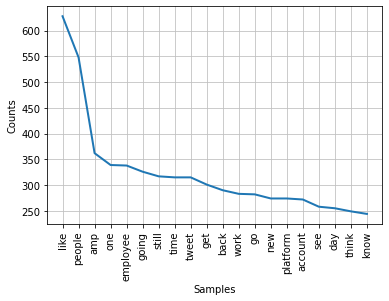

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
print("FreqDist chart for the Hashtag 'twittertakeover' \n")
fdist.plot(20)

Word cloud

Wordcloud for the Hashtag 'twittertakeover' 



<function matplotlib.pyplot.show(close=None, block=None)>

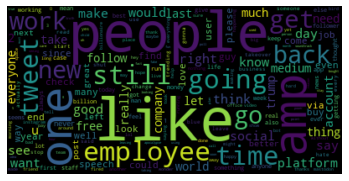

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

print("Wordcloud for the Hashtag 'twittertakeover' \n")
wordcloud2 = WordCloud().generate_from_frequencies(fdist)
plt.figure()
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show

#### Process for the hashtag "elonmusktwitter"

Tokenizing

In [15]:
# Tokenize the text
from nltk.tokenize import sent_tokenize,word_tokenize

# Remove URLs before tokenizing
elonmusktwitter_text = re.sub(r"\S*http.*?(?=\s)", "", elonmusktwitter_text, flags=re.MULTILINE)

sentToken = sent_tokenize(elonmusktwitter_text)
wordToken = word_tokenize(elonmusktwitter_text)

print("# of sentences:", len(sentToken))
print("# of words after tokenizing:", len(wordToken))
print(wordToken[:20])

# of sentences: 10821
# of words after tokenizing: 192827
['Twitter', 'Elon', 'Musk', 'just', 'decided', 'to', 'bring', 'the', 'worst', 'people', 'back', 'to', 'Twitter', 'Elon', 'Musk', '(', 'Person', 'who', 'changes', 'everything']


The text is divided by sentences and words using nltk.tokenize library. It shows first 20 words in wordToken list.

In [16]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(elonmusktwitter_text.lower())
print("# of words after punctuation removing:", len(words))
print(words[:20])

# of words after punctuation removing: 165591
['twitter', 'elon', 'musk', 'just', 'decided', 'to', 'bring', 'the', 'worst', 'people', 'back', 'to', 'twitter', 'elon', 'musk', 'person', 'who', 'changes', 'everything', 'full']


All letters become lower cases. All special characters and punctuation are removed by using RegexpTokenizer. Now, all words are in lower cases and the list does not contain special characters or punctuation. 

In [17]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
filtered_words = [word for word in words if word not in stopwords.words('english')]
print("# of words without stop words:", len(filtered_words))
fdist = FreqDist(filtered_words)
print(fdist)
print(filtered_words[:20])

# of words without stop words: 92087
<FreqDist with 12569 samples and 92087 outcomes>
['twitter', 'elon', 'musk', 'decided', 'bring', 'worst', 'people', 'back', 'twitter', 'elon', 'musk', 'person', 'changes', 'everything', 'full', 'claims', 'number', 'new', 'users', 'signing']


It removes all the stop words by using stopwords feature from nltk.corpus. It gives the number of words without stop words. Also, it gives the number of the distinct cleaned words out of all words by using FreqDist from nltk.probability.

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokensLem = []
for word in filtered_words:
    tokensLem.append(lemmatizer.lemmatize(word))

Removing unnecessary words for analysis

In [19]:
unnecessary_words = ['. . .', '| | |', '? ? ?', '! ! !', '& amp ;', '’', 'twitter', 'mr', 'co', 'http', 'ðÿ', 'â', 'twittertakeover', 'elonmusktwitter','riptwitter', 'thankyouelonmusk', 'elonmusk', 'musk', 'elon']
for word in list(tokensLem):
    if word in unnecessary_words:
        tokensLem.remove(word)

In [20]:
tokensLem[0:25]

['decided',
 'bring',
 'worst',
 'people',
 'back',
 'person',
 'change',
 'everything',
 'full',
 'claim',
 'number',
 'new',
 'user',
 'signing',
 'time',
 'high',
 'struggle',
 'large',
 'migration',
 'advertiser',
 'user',
 'moving',
 'platform',
 'due',
 'worry']

Freq Distribution of the words

In [21]:
fdist = FreqDist(tokensLem)
print(fdist)
fdist.most_common(15)

<FreqDist with 11353 samples and 84417 outcomes>


[('like', 673),
 ('people', 599),
 ('new', 583),
 ('free', 519),
 ('account', 494),
 ('blue', 475),
 ('one', 474),
 ('get', 456),
 ('amp', 432),
 ('8', 404),
 ('tweet', 401),
 ('speech', 395),
 ('back', 375),
 ('platform', 363),
 ('day', 362)]

FreqDist chart for the Hashtag 'elonmusktwitter' 



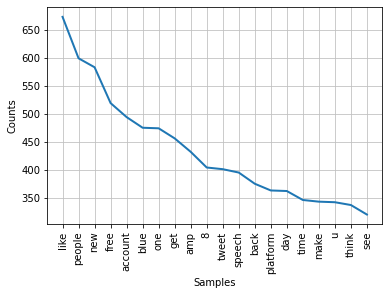

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
print("FreqDist chart for the Hashtag 'elonmusktwitter' \n")
fdist.plot(20)

Word cloud

Wordcloud for the Hashtag 'elonmusktwitter' 



<function matplotlib.pyplot.show(close=None, block=None)>

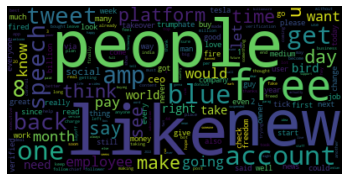

In [23]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

print("Wordcloud for the Hashtag 'elonmusktwitter' \n")
wordcloud2 = WordCloud().generate_from_frequencies(fdist)
plt.figure()
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show

#### Process for the hashtag "riptwitter"

Tokenizing

In [24]:
# Tokenize the text
from nltk.tokenize import sent_tokenize,word_tokenize

# Remove URLs before tokenizing
riptwitter_text = re.sub(r"\S*http.*?(?=\s)", "", riptwitter_text, flags=re.MULTILINE)

sentToken = sent_tokenize(riptwitter_text)
wordToken = word_tokenize(riptwitter_text)

print("# of sentences:", len(sentToken))
print("# of words after tokenizing:", len(wordToken))
print(wordToken[:20])

# of sentences: 8075
# of words after tokenizing: 141220
['Twitterpocalyspe', 'Frenzy', 'Playlist', 'ItsACityOfApes', 'The', 'Ape', 'News', 'Pictogram', 'Service', 'Batch', '6', '.', 'Twitterpocalypse', 'On', '!', 'Interpretation', 'through', 'meme', 'attack', '.']


The text is divided by sentences and words using nltk.tokenize library. It shows first 20 words in wordToken list.

In [25]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(riptwitter_text.lower())
print("# of words after punctuation removing:", len(words))
print(words[:20])

# of words after punctuation removing: 121911
['twitterpocalyspe', 'frenzy', 'playlist', 'itsacityofapes', 'the', 'ape', 'news', 'pictogram', 'service', 'batch', '6', 'twitterpocalypse', 'on', 'interpretation', 'through', 'meme', 'attack', 'developed', 'and', 'ongoing']


All letters become lower cases. All special characters and punctuation are removed by using RegexpTokenizer. Now, all words are in lower cases and the list does not contain special characters or punctuation. 

In [26]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
filtered_words = [word for word in words if word not in stopwords.words('english')]
print("# of words without stop words:", len(filtered_words))
fdist = FreqDist(filtered_words)
print(fdist)
print(filtered_words[:20])

# of words without stop words: 66435
<FreqDist with 11117 samples and 66435 outcomes>
['twitterpocalyspe', 'frenzy', 'playlist', 'itsacityofapes', 'ape', 'news', 'pictogram', 'service', 'batch', '6', 'twitterpocalypse', 'interpretation', 'meme', 'attack', 'developed', 'ongoing', 'storyline', 'memes', 'twitterpocalyspe', 'frenzy']


It removes all the stop words by using stopwords feature from nltk.corpus. It gives the number of words without stop words. Also, it gives the number of the distinct cleaned words out of all words by using FreqDist from nltk.probability.

In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokensLem = []
for word in filtered_words:
    tokensLem.append(lemmatizer.lemmatize(word))

Removing unnecessary words for analysis

In [28]:
unnecessary_words = ['. . .', '| | |', '? ? ?', '! ! !', '& amp ;', '’', 'twitter', 'mr', 'co', 'http', 'ðÿ', 'â', 'twittertakeover', 'elonmusktwitter','riptwitter', 'thankyouelonmusk', 'elonmusk', 'musk', 'elon']
for word in list(tokensLem):
    if word in unnecessary_words:
        tokensLem.remove(word)

In [29]:
tokensLem[0:25]

['twitterpocalyspe',
 'frenzy',
 'playlist',
 'itsacityofapes',
 'ape',
 'news',
 'pictogram',
 'service',
 'batch',
 '6',
 'twitterpocalypse',
 'interpretation',
 'meme',
 'attack',
 'developed',
 'ongoing',
 'storyline',
 'meme',
 'twitterpocalyspe',
 'frenzy',
 'playlist',
 'itsacityofapes',
 'ape',
 'news',
 'pictogram']

Freq Distribution of the words

In [30]:
fdist = FreqDist(tokensLem)
print(fdist)
fdist.most_common(15)

<FreqDist with 10124 samples and 62709 outcomes>


[('like', 543),
 ('people', 454),
 ('back', 399),
 ('still', 370),
 ('amp', 350),
 ('trump', 343),
 ('account', 337),
 ('tweet', 332),
 ('time', 325),
 ('russian', 320),
 ('one', 313),
 ('go', 307),
 ('get', 301),
 ('going', 292),
 ('see', 289)]

FreqDist chart for the Hashtag 'riptwitter' 



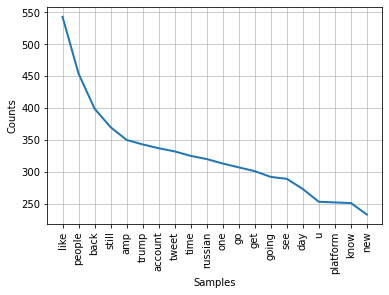

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
print("FreqDist chart for the Hashtag 'riptwitter' \n")
fdist.plot(20)

Word cloud

Wordcloud for the Hashtag 'riptwitter' 



<function matplotlib.pyplot.show(close=None, block=None)>

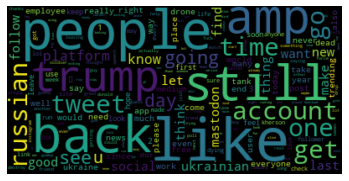

In [32]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

print("Wordcloud for the Hashtag 'riptwitter' \n")
wordcloud2 = WordCloud().generate_from_frequencies(fdist)
plt.figure()
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show

#### Process for the hashtag "thankyouelonmusk"

Tokenizing

In [33]:
# Tokenize the text
from nltk.tokenize import sent_tokenize,word_tokenize

# Remove URLs before tokenizing
thankyouelonmusk_text = re.sub(r"\S*http.*?(?=\s)", "", thankyouelonmusk_text, flags=re.MULTILINE)

sentToken = sent_tokenize(thankyouelonmusk_text)
wordToken = word_tokenize(thankyouelonmusk_text)

print("# of sentences:", len(sentToken))
print("# of words after tokenizing:", len(wordToken))
print(wordToken[:20])

# of sentences: 1742
# of words after tokenizing: 25507
['I', 'am', 'loving', 'this', ',', 'this', 'is', 'too', 'effin', 'funny', ',', 'I', 'think', 'mike', 'is', 'ok', 'with', 'the', 'jokes', '.']


The text is divided by sentences and words using nltk.tokenize library. It shows first 20 words in wordToken list.

In [34]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(thankyouelonmusk_text.lower())
print("# of words after punctuation removing:", len(words))
print(words[:20])

# of words after punctuation removing: 21888
['i', 'am', 'loving', 'this', 'this', 'is', 'too', 'effin', 'funny', 'i', 'think', 'mike', 'is', 'ok', 'with', 'the', 'jokes', 'i', 'am', 'high']


All letters become lower cases. All special characters and punctuation are removed by using RegexpTokenizer. Now, all words are in lower cases and the list does not contain special characters or punctuation. 

In [35]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
filtered_words = [word for word in words if word not in stopwords.words('english')]
print("# of words without stop words:", len(filtered_words))
fdist = FreqDist(filtered_words)
print(fdist)
print(filtered_words[:20])

# of words without stop words: 11373
<FreqDist with 3417 samples and 11373 outcomes>
['loving', 'effin', 'funny', 'think', 'mike', 'ok', 'jokes', 'high', 'kite', 'kalifa', 'script', 'goods', 'hahaha', 'love', 'proud', 'love', 'people', 'bots', 'want', 'gone']


It removes all the stop words by using stopwords feature from nltk.corpus. It gives the number of words without stop words. Also, it gives the number of the distinct cleaned words out of all words by using FreqDist from nltk.probability.

In [36]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokensLem = []
for word in filtered_words:
    tokensLem.append(lemmatizer.lemmatize(word))

Removing unnecessary words for analysis

In [37]:
unnecessary_words = ['. . .', '| | |', '? ? ?', '! ! !', '& amp ;', '’', 'twitter', 'mr', 'co', 'http', 'ðÿ', 'â', 'twittertakeover', 'elonmusktwitter','riptwitter', 'thankyouelonmusk', 'elonmusk', 'musk', 'elon']
for word in list(tokensLem):
    if word in unnecessary_words:
        tokensLem.remove(word)

In [38]:
tokensLem[0:25]

['loving',
 'effin',
 'funny',
 'think',
 'mike',
 'ok',
 'joke',
 'high',
 'kite',
 'kalifa',
 'script',
 'good',
 'hahaha',
 'love',
 'proud',
 'love',
 'people',
 'bot',
 'want',
 'gone',
 'controlled',
 'head',
 'could',
 'neuralink',
 'tourette']

Freq Distribution of the words

In [39]:
fdist = FreqDist(tokensLem)
print(fdist)
fdist.most_common(15)

<FreqDist with 3161 samples and 10833 outcomes>


[('back', 150),
 ('speech', 146),
 ('free', 128),
 ('thank', 125),
 ('people', 92),
 ('like', 75),
 ('u', 73),
 ('one', 71),
 ('freedom', 69),
 ('0', 65),
 ('time', 64),
 ('1', 63),
 ('amp', 61),
 ('get', 57),
 ('say', 55)]

FreqDist chart for the Hashtag 'thankyouelonmusk' 



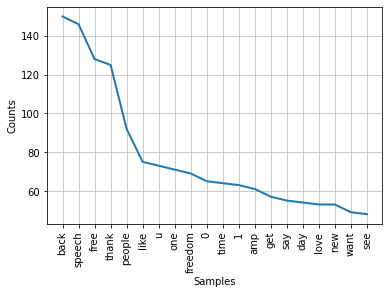

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
print("FreqDist chart for the Hashtag 'thankyouelonmusk' \n")
fdist.plot(20)

Word cloud

Wordcloud for the Hashtag 'thankyouelonmusk' 



<function matplotlib.pyplot.show(close=None, block=None)>

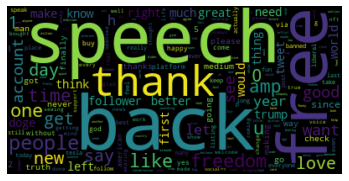

In [41]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

print("Wordcloud for the Hashtag 'thankyouelonmusk' \n")
wordcloud2 = WordCloud().generate_from_frequencies(fdist)
plt.figure()
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show

## 2. Process from Lab2

Clean the text (removing punctuations and stopwords)

In [42]:
from nltk import wordpunct_tokenize
import string
from nltk.corpus import stopwords

def remove_punctuation(txt):
    return "".join([c for c in txt if c not in string.punctuation])

def get_clean_words(text):
    stop_words = stopwords.words("english")
    words = wordpunct_tokenize(text)
    words = [remove_punctuation(word) for word in words if remove_punctuation(word) != ""]
    words = [word for word in words if word not in stop_words+["e","g"]] #this is for the text "e.g."
    return words

In [43]:
twittertakeover_words = get_clean_words(twittertakeover_text.lower())
print(twittertakeover_words[0:20])

elonmusktwitter_words = get_clean_words(elonmusktwitter_text.lower())
print(elonmusktwitter_words[0:20])

riptwitter_words = get_clean_words(riptwitter_text.lower())
print(riptwitter_words[0:20])

thankyouelonmusk_words = get_clean_words(thankyouelonmusk_text.lower())
print(thankyouelonmusk_words[0:20])

['make', 'sure', 'check', '1st', 'ever', 'sunday', 'review', '6', 'pm', 'twitter', 'fun', 'right', 'best', 'feature', 'one', 'line', 'replies', 'try', 'explain', 'success']
['twitter', 'elon', 'musk', 'decided', 'bring', 'worst', 'people', 'back', 'twitter', 'elon', 'musk', 'person', 'changes', 'everything', 'full', 'claims', 'number', 'new', 'users', 'signing']
['twitterpocalyspe', 'frenzy', 'playlist', 'itsacityofapes', 'ape', 'news', 'pictogram', 'service', 'batch', '6', 'twitterpocalypse', 'interpretation', 'meme', 'attack', 'developed', 'ongoing', 'storyline', 'memes', 'twitterpocalyspe', 'frenzy']
['loving', 'effin', 'funny', 'think', 'mike', 'ok', 'jokes', 'high', 'kite', 'kalifa', 'script', 'goods', 'hahaha', '😜', 'love', 'proud', 'love', 'people', 'bots', 'want']


In [44]:
unnecessary_words = ['’', 'twitter', 'mr', 'co', 'http', 'ðÿ', 'â', 'twittertakeover', 'elonmusktwitter','riptwitter', 'thankyouelonmusk', 'elonmusk', 'musk', 'elon']

for word in list(twittertakeover_words):
    if word in unnecessary_words:
        twittertakeover_words.remove(word)

for word in list(elonmusktwitter_words):
    if word in unnecessary_words:
        elonmusktwitter_words.remove(word)

for word in list(riptwitter_words):
    if word in unnecessary_words:
        riptwitter_words.remove(word)

for word in list(thankyouelonmusk_words):
    if word in unnecessary_words:
        thankyouelonmusk_words.remove(word)

Frequent distribution for each hashtag

In [45]:
from nltk.probability import FreqDist
def calculate_words_frequency(words):
    fdist_words = FreqDist(words)
    max_count = fdist_words.most_common(1)[0][1]
    for word in fdist_words.keys():
        fdist_words[word] = fdist_words[word] / max_count
    return fdist_words

In [46]:
twittertakeover_words_freq = calculate_words_frequency(twittertakeover_words)
print("Words frequency for the hashtag 'twittertakeover'")
print(twittertakeover_words_freq.most_common(20))

elonmusktwitter_words_freq = calculate_words_frequency(elonmusktwitter_words)
print("\nWords frequency for the hashtag 'elonmusktwitter'")
print(elonmusktwitter_words_freq.most_common(20))

riptwitter_words_freq = calculate_words_frequency(riptwitter_words)
print("\nWords frequency for the hashtag 'riptwitter'")
print(riptwitter_words_freq.most_common(20) )

thankyouelonmusk_words_freq = calculate_words_frequency(thankyouelonmusk_words)
print("\nWords frequency for the hashtag 'thankyoutwitter'")
print(thankyouelonmusk_words_freq.most_common(20))

Words frequency for the hashtag 'twittertakeover'
[('like', 1.0), ('people', 0.8847402597402597), ('amp', 0.5876623376623377), ('going', 0.5275974025974026), ('still', 0.5146103896103896), ('one', 0.49837662337662336), ('employees', 0.48538961038961037), ('time', 0.4724025974025974), ('back', 0.46915584415584416), ('new', 0.4448051948051948), ('see', 0.4090909090909091), ('work', 0.4025974025974026), ('get', 0.400974025974026), ('…', 0.3944805194805195), ('would', 0.3912337662337662), ('platform', 0.3814935064935065), ('good', 0.3814935064935065), ('think', 0.36688311688311687), ('social', 0.3555194805194805), ('right', 0.33766233766233766)]

Words frequency for the hashtag 'elonmusktwitter'
[('like', 1.0), ('people', 0.9182098765432098), ('new', 0.8996913580246914), ('free', 0.7978395061728395), ('blue', 0.7330246913580247), ('one', 0.6975308641975309), ('amp', 0.6666666666666666), ('get', 0.6327160493827161), ('8', 0.6234567901234568), ('speech', 0.6080246913580247), ('back', 0.57561

Score the sentences and build a summary based on sentence count, word count, and percentage for each hashtag

In [47]:
from nltk import sent_tokenize

def score_sentence(sentence):
    words = wordpunct_tokenize(sentence.lower())
    score = 0
    for word in words:
        if word in twittertakeover_words_freq.keys():
            score += twittertakeover_words_freq[word]
    return score
sentences = sent_tokenize(twittertakeover_text)
sent_dict = {}
for sentence in sentences:
    score = score_sentence(sentence)
    sent_dict[sentence] = score
    
#sort the sentences in sent_dict by their scores
sent_dict = {key:value for key, value in sorted(sent_dict.items(), key=lambda item: item[1], reverse=True)}
print("The scores for the sentences of the hashtag 'twittertakeover' \n")
sent_dict

The scores for the sentences of the hashtag 'twittertakeover' 



{"So if this is my last  I'd like to say from th One last time 😢👇\nCan I get 2k likes for this tweet ❤️\n\n  \n   That’s an L bozo twitter   Goop morning Twitter ☀️☀️\n\nDesigned this in honor of all the shit Elon CrotchMusk has put us through for the past few weeks\U0001fae1\U0001fae1\U0001fae1\n\n      If  will sell Twitter again after he ruined it, and the employees he either fired or drove away will return, I actually would be willing to pay 2$ amonth per account if this means the platform would moderate hate speech and be adfree for those who pay\n\n Skip Bayless will soon be obsolete.. Wonder how many Twitter employees will realize their jobs were really not as important as they thought as Twitter continues to function fine without them.": 9.275974025974024,
 "🤔 If today is the end of Twitter then I will follow everyone who like this tweet for the last time... 💔\U0001fae1\n \n \n I'm still trying to find my way to loving twitter and now this  \n\n  say it isn't so I think I'm rea

In [48]:
def build_summary_based_on_sentence_count(sentence_count):
    result = ""
    i = 0
    for sentence, score in sent_dict.items():
        if i >= sentence_count:
            break
        if result != "":
            result += "\n"
        result += sentence
        i += 1
    return result

def build_summary_based_on_word_count(word_count):
    result = ""
    sent_index = 0
    word_index = 0
    word_counter = 0
    sent_words = []
    space = ""
    new_line = ""
    sentences = list(sent_dict) # this list is sorted, because we have sorted the sent_dict
    while word_counter < word_count:
        if len(sent_words) == 0: # we need to read a new sentence and tokenize it
            sent_words = wordpunct_tokenize(sentences[sent_index])
            word_index = 0 # reset the pointer to the word in the sentence
            space = ""
            if len(result)>0: # this is not the first sentence and we have some words before this so we add a new line
                new_line = "\n"
        if word_index < len(sent_words): # we can read from sentence 
            result += new_line + space + sent_words[word_index]
            word_index += 1
            word_counter += 1
            space = " "
            new_line = ""
        else:
            sent_words = [] #current sentence is done and we need to read another sentence
            sent_index += 1
    return result

def build_summary_based_on_percentage(percentage):
    total_words = len(twittertakeover_words)
    word_count = (percentage/100)*total_words
    return build_summary_based_on_word_count(word_count)

print("Summary for the hashtag 'twittertakeover' \n")
print("summary based on sentence count:")
print(build_summary_based_on_sentence_count(2))
print("\n\n\nsummary based on word count:")
print(build_summary_based_on_word_count(100))
print("\n\n\nsummary based on percentage:")
print(build_summary_based_on_percentage(15))

Summary for the hashtag 'twittertakeover' 

summary based on sentence count:
So if this is my last  I'd like to say from th One last time 😢👇
Can I get 2k likes for this tweet ❤️

  
   That’s an L bozo twitter   Goop morning Twitter ☀️☀️

Designed this in honor of all the shit Elon CrotchMusk has put us through for the past few weeks🫡🫡🫡

      If  will sell Twitter again after he ruined it, and the employees he either fired or drove away will return, I actually would be willing to pay 2$ amonth per account if this means the platform would moderate hate speech and be adfree for those who pay

 Skip Bayless will soon be obsolete.. Wonder how many Twitter employees will realize their jobs were really not as important as they thought as Twitter continues to function fine without them.
🤔 If today is the end of Twitter then I will follow everyone who like this tweet for the last time... 💔🫡
 
 
 I'm still trying to find my way to loving twitter and now this  

  say it isn't so I think I'm re

In [49]:
def score_sentence(sentence):
    words = wordpunct_tokenize(sentence.lower())
    score = 0
    for word in words:
        if word in elonmusktwitter_words_freq.keys():
            score += elonmusktwitter_words_freq[word]
    return score
sentences = sent_tokenize(elonmusktwitter_text)
sent_dict = {}
for sentence in sentences:
    score = score_sentence(sentence)
    sent_dict[sentence] = score
    
#sort the sentences in sent_dict by their scores
sent_dict = {key:value for key, value in sorted(sent_dict.items(), key=lambda item: item[1], reverse=True)}
print("The scores for the sentences of the hashtag 'elonmusktwitter' \n")
sent_dict

The scores for the sentences of the hashtag 'elonmusktwitter' 



{'MUSK: FREE SPEECH IS $20\n\nA billionaire as a matter of fate\nSaid that  will make  great\n..but when people he bossed\n..asked “what will it cost?”\nHe said “20 bucks per month, or just 8.”\n\n  \n \n\n Elon Musk, founder of Tesla and SpaceX and new owner of Twitter has announced a plan to start charging Twitter users $8/month to earn the coveted blue tick that signifies verified accounts.': 10.725308641975309,
 'Start your ASA free trial 👉 \n       Hot hot take \n\nElons plan — \n\nPhase 1:\n\n-Layoff staff\n\n-Disrupt disrupt disrupt\n\n-File bankruptcy\n\nPhase 2:\n\n-Tesla buys twitter for cents on the $\n\n-Tesla owners get free blue check and tweet in their Teslas how much they love Elon\n\n  Twitter meltdown\n      I only read  Account \nAnd\n \n Constantly clicking people’s pages to check if they legit or not is getting annoying…..     Twitter is a great place to social media, Just need to get rid of terrorists from the platform.': 10.722222222222223,
 "If people like  ,  a

In [50]:
def build_summary_based_on_percentage(percentage):
    total_words = len(elonmusktwitter_words)
    word_count = (percentage/100)*total_words
    return build_summary_based_on_word_count(word_count)

print("Summary for the hashtag 'elonmusktwitter' \n")
print("summary based on sentence count:")
print(build_summary_based_on_sentence_count(2))
print("\n\n\nsummary based on word count:")
print(build_summary_based_on_word_count(100))
print("\n\n\nsummary based on percentage:")
print(build_summary_based_on_percentage(15))

Summary for the hashtag 'elonmusktwitter' 

summary based on sentence count:
MUSK: FREE SPEECH IS $20

A billionaire as a matter of fate
Said that  will make  great
..but when people he bossed
..asked “what will it cost?”
He said “20 bucks per month, or just 8.”

  
 

 Elon Musk, founder of Tesla and SpaceX and new owner of Twitter has announced a plan to start charging Twitter users $8/month to earn the coveted blue tick that signifies verified accounts.
Start your ASA free trial 👉 
       Hot hot take 

Elons plan — 

Phase 1:

-Layoff staff

-Disrupt disrupt disrupt

-File bankruptcy

Phase 2:

-Tesla buys twitter for cents on the $

-Tesla owners get free blue check and tweet in their Teslas how much they love Elon

  Twitter meltdown
      I only read  Account 
And
 
 Constantly clicking people’s pages to check if they legit or not is getting annoying…..     Twitter is a great place to social media, Just need to get rid of terrorists from the platform.



summary based on word co

In [51]:
def score_sentence(sentence):
    words = wordpunct_tokenize(sentence.lower())
    score = 0
    for word in words:
        if word in riptwitter_words_freq.keys():
            score += riptwitter_words_freq[word]
    return score
sentences = sent_tokenize(riptwitter_text)
sent_dict = {}
for sentence in sentences:
    score = score_sentence(sentence)
    sent_dict[sentence] = score
    
#sort the sentences in sent_dict by their scores
sent_dict = {key:value for key, value in sorted(sent_dict.items(), key=lambda item: item[1], reverse=True)}
print("The scores for the sentences of the hashtag 'riptwitter' \n")
sent_dict

The scores for the sentences of the hashtag 'riptwitter' 



{'If twitter is dying, it’s time to tweet the most stupid shit you can,so can be screenshotted and posted to tiktok like they do with old vine videos  tRump is back,  Ukrainian drone hammers Russian troops with bombs on the front line\n     #\n Elon Musk   - Twitter Up\n   \n\n#̷G̷o̷o̷d̷b̷y̷e̷T̷w̷i̷t̷t̷e̷r̷ #̷T̷w̷i̷t̷t̷e̷r̷s̷h̷u̷t̷d̷o̷w̷n̷ #̷T̷w̷i̷t̷t̷e̷r̷d̷o̷w̷n̷ #̷R̷i̷p̷T̷w̷i̷t̷t̷e̷r̷  Goodbye twitter, been a good run.': 18.300578034682058,
 "chef’s kiss, would recommend HELP RETWEET PLS 🙏\n\n(Foreign Used) 2016 Honda Accord\nPrice: 10Million Naira \n\nDM📩 for more info or\nCall 08091183592\n\n.\n.\n.\n.\n \n \n  Elon Musk  destroys the wall of censorship and discrimination on Twitter\n   \n\n#̷G̷o̷o̷d̷b̷y̷e̷T̷w̷i̷t̷t̷e̷r̷ #̷T̷w̷i̷t̷t̷e̷r̷s̷h̷u̷t̷d̷o̷w̷n̷ #̷T̷w̷i̷t̷t̷e̷r̷d̷o̷w̷n̷ #̷R̷i̷p̷T̷w̷i̷t̷t̷e̷r̷  It's official!": 13.165703275529857,
 "Ah, well    And for Twitter to unban the former president of the United States onto its platform goes to show you the The reckless behavior that

In [52]:
def build_summary_based_on_percentage(percentage):
    total_words = len(riptwitter_words)
    word_count = (percentage/100)*total_words
    return build_summary_based_on_word_count(word_count)

print("Summary for the hashtag 'riptwitter' \n")
print("summary based on sentence count:")
print(build_summary_based_on_sentence_count(2))
print("\n\n\nsummary based on word count:")
print(build_summary_based_on_word_count(100))
print("\n\n\nsummary based on percentage:")
print(build_summary_based_on_percentage(15))

Summary for the hashtag 'riptwitter' 

summary based on sentence count:
If twitter is dying, it’s time to tweet the most stupid shit you can,so can be screenshotted and posted to tiktok like they do with old vine videos  tRump is back,  Ukrainian drone hammers Russian troops with bombs on the front line
     #
 Elon Musk   - Twitter Up
   

#̷G̷o̷o̷d̷b̷y̷e̷T̷w̷i̷t̷t̷e̷r̷ #̷T̷w̷i̷t̷t̷e̷r̷s̷h̷u̷t̷d̷o̷w̷n̷ #̷T̷w̷i̷t̷t̷e̷r̷d̷o̷w̷n̷ #̷R̷i̷p̷T̷w̷i̷t̷t̷e̷r̷  Goodbye twitter, been a good run.
chef’s kiss, would recommend HELP RETWEET PLS 🙏

(Foreign Used) 2016 Honda Accord
Price: 10Million Naira 

DM📩 for more info or
Call 08091183592

.
.
.
.
 
 
  Elon Musk  destroys the wall of censorship and discrimination on Twitter
   

#̷G̷o̷o̷d̷b̷y̷e̷T̷w̷i̷t̷t̷e̷r̷ #̷T̷w̷i̷t̷t̷e̷r̷s̷h̷u̷t̷d̷o̷w̷n̷ #̷T̷w̷i̷t̷t̷e̷r̷d̷o̷w̷n̷ #̷R̷i̷p̷T̷w̷i̷t̷t̷e̷r̷  It's official!



summary based on word count:
If twitter is dying , it ’ s time to tweet the most stupid shit you can , so can be screenshotted and posted to 

In [53]:
def score_sentence(sentence):
    words = wordpunct_tokenize(sentence.lower())
    score = 0
    for word in words:
        if word in thankyouelonmusk_words_freq.keys():
            score += thankyouelonmusk_words_freq[word]
    return score
sentences = sent_tokenize(thankyouelonmusk_text)
sent_dict = {}
for sentence in sentences:
    score = score_sentence(sentence)
    sent_dict[sentence] = score
    
#sort the sentences in sent_dict by their scores
sent_dict = {key:value for key, value in sorted(sent_dict.items(), key=lambda item: item[1], reverse=True)}
print("The scores for the sentences of the hashtag 'thankyouelonmusk' \n")
sent_dict

The scores for the sentences of the hashtag 'thankyouelonmusk' 



{'H A S H T A G  P A R T Y 🦄💯🔥😛😝🤷\u200d♂️😍🥰😚😜🤪✨☄️⚖️💎🧨🧱🔭🧬🧪🪄🎎🧧📈💜♌️💠🏳️\n \n$DOGE \n \n \n \n \n \n \n\n \n \n \n  H A S H T A G  P A R T Y  🎉💥🎉\n$DOGE \n \n \n \n \n\n \n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n \n  watching your show Give me a shout out brother DOGE TO THE MOON   H A S H T A G  P A R T Y  🎉💥🎉\n$DOGE \n \n \n \n \n\n 🚀\n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n \n H A S H   T A G  P A R T Y\n$DOGE \n \n \n\n \n \n \n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n\n H A S H T A G  P A R T Y  🎉💥🎉\n$DOGE \n \n \n \n \n \n 🚀\n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n \n   Hope to see dogecoin go up to 10 cents or more by the end of the month   H A S H T A G  P A R T Y  🎉💥🎉\n$DOGE \n \n \n \n \n 🔝\n 🚀\n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n \n H A S H T A G  P A R T Y  🎉💥🎉\n$DOGE \n \n \n \n ⚠️\n 🔝\n 🚀\n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n \n H A S H T A G  P A R T Y\n $DOGE \n \n \n\n \n \n \n 1️⃣\n 1️⃣0️⃣\n 5️⃣0️⃣\n 1️⃣0️⃣0️⃣\n\n H A S H T A G  P A R T Y  🎉💥🎉\n$DOGE \n \n \n 📈\n ⚠️\n 🔝\n 🚀\n 1️⃣\n 1️⃣0

In [54]:
def build_summary_based_on_percentage(percentage):
    total_words = len(thankyouelonmusk_words)
    word_count = (percentage/100)*total_words
    return build_summary_based_on_word_count(word_count)

print("Summary for the hashtag 'thankyouelonmusk' \n")
print("summary based on sentence count:")
print(build_summary_based_on_sentence_count(2))
print("\n\n\nsummary based on word count:")
print(build_summary_based_on_word_count(100))
print("\n\n\nsummary based on percentage:")
print(build_summary_based_on_percentage(15))

Summary for the hashtag 'thankyouelonmusk' 

summary based on sentence count:
H A S H T A G  P A R T Y 🦄💯🔥😛😝🤷‍♂️😍🥰😚😜🤪✨☄️⚖️💎🧨🧱🔭🧬🧪🪄🎎🧧📈💜♌️💠🏳️
 
$DOGE 
 
 
 
 
 
 

 
 
 
  H A S H T A G  P A R T Y  🎉💥🎉
$DOGE 
 
 
 
 

 
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣
 
  watching your show Give me a shout out brother DOGE TO THE MOON   H A S H T A G  P A R T Y  🎉💥🎉
$DOGE 
 
 
 
 

 🚀
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣
 
 H A S H   T A G  P A R T Y
$DOGE 
 
 

 
 
 
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣

 H A S H T A G  P A R T Y  🎉💥🎉
$DOGE 
 
 
 
 
 
 🚀
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣
 
   Hope to see dogecoin go up to 10 cents or more by the end of the month   H A S H T A G  P A R T Y  🎉💥🎉
$DOGE 
 
 
 
 
 🔝
 🚀
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣
 
 H A S H T A G  P A R T Y  🎉💥🎉
$DOGE 
 
 
 
 ⚠️
 🔝
 🚀
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣
 
 H A S H T A G  P A R T Y
 $DOGE 
 
 

 
 
 
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣

 H A S H T A G  P A R T Y  🎉💥🎉
$DOGE 
 
 
 📈
 ⚠️
 🔝
 🚀
 1️⃣
 1️⃣0️⃣
 5️⃣0️⃣
 1️⃣0️⃣0️⃣
 
 H A S H T A G  P 

Text summarization with N-grams for each hashtag

In [55]:
from nltk import ngrams, word_tokenize

#function to generate n-grams from the text.
def generate_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text.lower()), n)
    return [' '.join(grams) for grams in n_grams]

In [93]:
import re

#remove unnecessary words in the texts
unnecessary_words = ['. . .', '| | |', '? ? ?', '! ! !', '& amp ;', '’', 'twitter', 'mr', 'mr.','mr.musk', 'co', 'http', 'ðÿ', 'â', 'twittertakeover', 'elonmusktwitter','riptwitter', 'thankyouelonmusk', 'elonmusk', 'musk', 'elon']

text_words = twittertakeover_text.split()
resultwords  = [word for word in text_words if word.lower() not in unnecessary_words]
twittertakeover_text2 = ' '.join(resultwords)

text_words = elonmusktwitter_text.split()
resultwords  = [word for word in text_words if word.lower() not in unnecessary_words]
elonmusktwitter_text2 = ' '.join(resultwords)

text_words = riptwitter_text.split()
resultwords  = [word for word in text_words if word.lower() not in unnecessary_words]
riptwitter_text2 = ' '.join(resultwords)

text_words = thankyouelonmusk_text.split()
resultwords  = [word for word in text_words if word.lower() not in unnecessary_words]
thankyouelonmusk_text2 = ' '.join(resultwords)

In [94]:
print("N-grams for the hashtag 'twittertakeover' \n")

n2_grams = generate_ngrams(twittertakeover_text2, 2)
print("bi-grams:")
print(n2_grams[0:20])

n3_grams = generate_ngrams(twittertakeover_text2, 3)
print("\ntri-grams:")
print(n3_grams[0:20])

n4_grams = generate_ngrams(twittertakeover_text2, 4)
print("\n4-grams:")
print(n4_grams[0:20])

N-grams for the hashtag 'twittertakeover' 

bi-grams:
['make sure', 'sure to', 'to check', 'check out', 'out our', 'our 1st', '1st ever', 'ever sunday', 'sunday review', 'review at', 'at 6', '6 pm', 'pm only', 'only on', 'on is', 'is so', 'so fun', 'fun right', 'right now', 'now .']

tri-grams:
['make sure to', 'sure to check', 'to check out', 'check out our', 'out our 1st', 'our 1st ever', '1st ever sunday', 'ever sunday review', 'sunday review at', 'review at 6', 'at 6 pm', '6 pm only', 'pm only on', 'only on is', 'on is so', 'is so fun', 'so fun right', 'fun right now', 'right now .', 'now . best']

4-grams:
['make sure to check', 'sure to check out', 'to check out our', 'check out our 1st', 'out our 1st ever', 'our 1st ever sunday', '1st ever sunday review', 'ever sunday review at', 'sunday review at 6', 'review at 6 pm', 'at 6 pm only', '6 pm only on', 'pm only on is', 'only on is so', 'on is so fun', 'is so fun right', 'so fun right now', 'fun right now .', 'right now . best', 'n

FreqDist chart for the hashtag 'twittertakeover' 

<FreqDist with 17441 samples and 18930 outcomes>
[('& amp ;', 76), ('it ’ s', 25), ('! ! !', 23), ('soundtrack for the', 17), ('? ? ?', 17), ('the entire human', 15), ('entire human rights', 15), ('human rights team', 15), ('. . .', 14), ('i ’ m', 13), ('| | |', 13), ('that ’ s', 12), ('i ’ ve', 10), ('laid off the', 10), ('off the entire', 10), ('. if you', 9), ('. this is', 9), ('& gt ;', 8), ('he ’ s', 8), ('what ’ s', 8)]


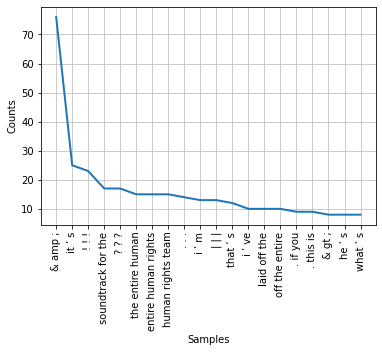

In [95]:
import matplotlib.pyplot as plt

def process_n_grams(n):
    n_grams = generate_ngrams(twittertakeover_text2, n)
    fdist_n_grams = FreqDist(n_grams)
    print(fdist_n_grams)
    print(fdist_n_grams.most_common(20))
    fdist_n_grams.plot(20)
    plt.show()
    
print("FreqDist chart for the hashtag 'twittertakeover' \n")
process_n_grams(3)

In [59]:
print("N-grams for the hashtag 'elonmusktwitter' \n")

n2_grams = generate_ngrams(elonmusktwitter_text2, 2)
print("bi-grams:")
print(n2_grams[0:20])

n3_grams = generate_ngrams(elonmusktwitter_text2, 3)
print("\ntri-grams:")
print(n3_grams[0:20])

n4_grams = generate_ngrams(elonmusktwitter_text2, 4)
print("\n4-grams:")
print(n4_grams[0:20])

N-grams for the hashtag 'elonmusktwitter' 

bi-grams:
['just decided', 'decided to', 'to bring', 'bring the', 'the worst', 'worst people', 'people back', 'back to', 'to (', '( person', 'person who', 'who changes', 'changes everything', 'everything )', ') full', 'full claims', 'claims that', 'that the', 'the number', 'number of']

tri-grams:
['just decided to', 'decided to bring', 'to bring the', 'bring the worst', 'the worst people', 'worst people back', 'people back to', 'back to (', 'to ( person', '( person who', 'person who changes', 'who changes everything', 'changes everything )', 'everything ) full', ') full claims', 'full claims that', 'claims that the', 'that the number', 'the number of', 'number of new']

4-grams:
['just decided to bring', 'decided to bring the', 'to bring the worst', 'bring the worst people', 'the worst people back', 'worst people back to', 'people back to (', 'back to ( person', 'to ( person who', '( person who changes', 'person who changes everything', 'who

FreqDist chart for the hashtag 'elonmusktwitter' 

<FreqDist with 151981 samples and 186814 outcomes>
[('& amp ;', 432), ('! ! !', 278), ('it ’ s', 174), ('i ’ m', 151), ('| | |', 143), ('don ’ t', 129), ('the bird is', 95), ('. . .', 80), ('$ 44 billion', 74), ('freedom of speech', 73), ('he ’ s', 71), ('musk ’ s', 70), ('? ? ?', 67), ('bird is freed', 64), ('a lot of', 63), ('twitter ’ s', 61), ('do you think', 58), ('social media platform', 57), (". it 's", 57), ('you ’ re', 56)]


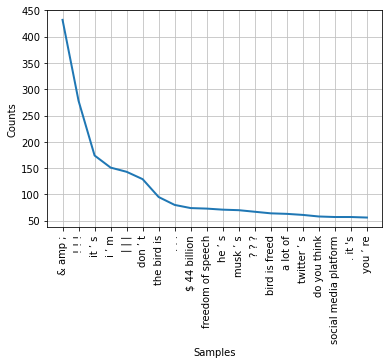

In [60]:
def process_n_grams(n):
    n_grams = generate_ngrams(elonmusktwitter_text2, n)
    fdist_n_grams = FreqDist(n_grams)
    print(fdist_n_grams)
    print(fdist_n_grams.most_common(20))
    fdist_n_grams.plot(20)
    plt.show()
    
print("FreqDist chart for the hashtag 'elonmusktwitter' \n")
process_n_grams(3)

In [61]:
print("N-grams for the hashtag 'riptwitter' \n")

n2_grams = generate_ngrams(riptwitter_text2, 2)
print("bi-grams:")
print(n2_grams[0:20])

n3_grams = generate_ngrams(riptwitter_text2, 3)
print("\ntri-grams:")
print(n3_grams[0:20])

n4_grams = generate_ngrams(riptwitter_text2, 4)
print("\n4-grams:")
print(n4_grams[0:20])

N-grams for the hashtag 'riptwitter' 

bi-grams:
['twitterpocalyspe frenzy', 'frenzy playlist', 'playlist itsacityofapes', 'itsacityofapes the', 'the ape', 'ape news', 'news pictogram', 'pictogram service', 'service batch', 'batch 6.', '6. twitterpocalypse', 'twitterpocalypse on', 'on !', '! interpretation', 'interpretation through', 'through meme', 'meme attack', 'attack .', '. developed', 'developed and']

tri-grams:
['twitterpocalyspe frenzy playlist', 'frenzy playlist itsacityofapes', 'playlist itsacityofapes the', 'itsacityofapes the ape', 'the ape news', 'ape news pictogram', 'news pictogram service', 'pictogram service batch', 'service batch 6.', 'batch 6. twitterpocalypse', '6. twitterpocalypse on', 'twitterpocalypse on !', 'on ! interpretation', '! interpretation through', 'interpretation through meme', 'through meme attack', 'meme attack .', 'attack . developed', '. developed and', 'developed and ongoing']

4-grams:
['twitterpocalyspe frenzy playlist itsacityofapes', 'frenzy 

FreqDist chart for the hashtag 'riptwitter' 

<FreqDist with 113329 samples and 138121 outcomes>
[('& amp ;', 350), ('it ’ s', 213), ('i ’ m', 176), ('! ! !', 126), ('don ’ t', 108), ('. i ’', 79), ('? ? ?', 67), ("i do n't", 65), (". it 's", 64), ('. it ’', 58), ('& gt ;', 55), ('on twitter .', 53), ('that ’ s', 50), (". i 'm", 49), ('. this is', 48), ('i ’ ll', 43), ('i ’ ve', 42), ('the end of', 42), ('’ s a', 41), ('can ’ t', 41)]


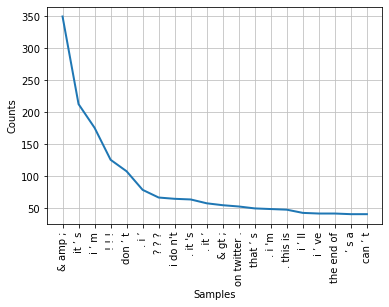

In [62]:
def process_n_grams(n):
    n_grams = generate_ngrams(riptwitter_text2, n)
    fdist_n_grams = FreqDist(n_grams)
    print(fdist_n_grams)
    print(fdist_n_grams.most_common(20))
    fdist_n_grams.plot(20)
    plt.show()
    
print("FreqDist chart for the hashtag 'riptwitter' \n")
process_n_grams(3)

In [63]:
print("N-grams for the hashtag 'thankyouelonmusk' \n")

n2_grams = generate_ngrams(thankyouelonmusk_text2, 2)
print("bi-grams:")
print(n2_grams[0:20])

n3_grams = generate_ngrams(thankyouelonmusk_text2, 3)
print("\ntri-grams:")
print(n3_grams[0:20])

n4_grams = generate_ngrams(thankyouelonmusk_text2, 4)
print("\n4-grams:")
print(n4_grams[0:20])

N-grams for the hashtag 'thankyouelonmusk' 

bi-grams:
['i am', 'am loving', 'loving this', 'this ,', ', this', 'this is', 'is too', 'too effin', 'effin funny', 'funny ,', ', i', 'i think', 'think mike', 'mike is', 'is ok', 'ok with', 'with the', 'the jokes', 'jokes .', '. i']

tri-grams:
['i am loving', 'am loving this', 'loving this ,', 'this , this', ', this is', 'this is too', 'is too effin', 'too effin funny', 'effin funny ,', 'funny , i', ', i think', 'i think mike', 'think mike is', 'mike is ok', 'is ok with', 'ok with the', 'with the jokes', 'the jokes .', 'jokes . i', '. i am']

4-grams:
['i am loving this', 'am loving this ,', 'loving this , this', 'this , this is', ', this is too', 'this is too effin', 'is too effin funny', 'too effin funny ,', 'effin funny , i', 'funny , i think', ', i think mike', 'i think mike is', 'think mike is ok', 'mike is ok with', 'is ok with the', 'ok with the jokes', 'with the jokes .', 'the jokes . i', 'jokes . i am', '. i am high']


FreqDist chart for the hashtag 'thankyouelonmusk' 

<FreqDist with 21884 samples and 25115 outcomes>
[('! ! !', 109), ('& amp ;', 61), ('thank you for', 37), ('it ’ s', 37), ('freedom of speech', 37), ('i ’ m', 29), ('don ’ t', 25), ('. thank you', 22), ('free speech .', 19), ('h a s', 19), ('a s h', 19), ('s h t', 19), ('h t a', 19), ('t a g', 19), ('a g p', 19), ('g p a', 19), ('p a r', 19), ('a r t', 19), ('r t y', 19), ('! thank you', 18)]


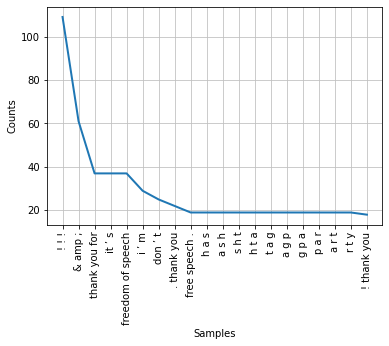

In [64]:
def process_n_grams(n):
    n_grams = generate_ngrams(thankyouelonmusk_text2, n)
    fdist_n_grams = FreqDist(n_grams)
    print(fdist_n_grams)
    print(fdist_n_grams.most_common(20))
    fdist_n_grams.plot(20)
    plt.show()
    
print("FreqDist chart for the hashtag 'thankyouelonmusk' \n")
process_n_grams(3)

## 3. Process from Lab3

#### Process for the hashtag "twittertakeover"

count all the named entities in the each hashtag

In [65]:
import en_core_web_md
from collections import Counter

nlp = en_core_web_md.load()

twittertakeover_text = twittertakeover_text[0:99999] # because the limit of nlp() is 100000 characters
doc = nlp(twittertakeover_text)
labels = [ent.label_ for ent in doc.ents]

print("Named entities for the hashtag 'twittertakeover' \n")
Counter(labels)

Named entities for the hashtag 'twittertakeover' 



Counter({'ORDINAL': 18,
         'DATE': 139,
         'TIME': 17,
         'CARDINAL': 116,
         'ORG': 364,
         'PERSON': 277,
         'WORK_OF_ART': 26,
         'GPE': 62,
         'PERCENT': 10,
         'MONEY': 32,
         'LOC': 6,
         'PRODUCT': 16,
         'NORP': 17,
         'QUANTITY': 2,
         'LAW': 1,
         'FAC': 1})

count the most frequent tokens for the entire text

In [66]:
import re

num_reg = re.compile('^-?\\d*(\\.\\d+)?$')

tokens = [token.text for token in doc if(not nlp.vocab[token.text].is_stop) and (num_reg.match(token.text) is None) and (not nlp.vocab[token.text].is_punct)]

ct = Counter(tokens)
ct.most_common(20)

[(' ', 554),
 ('Twitter', 260),
 ('\n\n', 161),
 ('  ', 142),
 ('Musk', 127),
 ('Elon', 124),
 ('😱', 105),
 ('amp', 76),
 ('   ', 71),
 ('twitter', 69),
 ('like', 68),
 ('people', 58),
 ('️', 44),
 ('new', 39),
 ('    ', 39),
 ('accounts', 37),
 ('🤣', 34),
 ('\n\n  ', 33),
 ('\n ', 33),
 ('\n\n   ', 32)]

Pick a random integer K using Python random module, then pick three consecutive sentences starting with Kth

In [67]:
import random

sents = list(doc.sents)

k = random.randint(0, len(sents)-2) # because we need to select 3 sentences and they must be in range of sentences
print("random selected k = {}\n".format(k))

selected_sents=[]
for i in range(k, k+3):
    selected_sents.append(sents[i])
    print("sent #{} : {}".format(i, sents[i]))

random selected k = 392

sent #392 : And I'm glad.
sent #393 : b/c youtube has a goldmine and has for a few years now been turning it to dust

they get everthg they deserve.
sent #394 : creators should abandon yt if they can
  Soundtrack for the twitter apocalypse/58
  
  


Extract part-of-speech and lemmatize these consecutive sentences

In [68]:
pos_lemma = []
for sent in selected_sents:
    for token in sent:
        if not token.is_stop and token.pos_ != 'PUNCT':
            pos_lemma.append((token.orth_, token.pos_, token.lemma_))
print(pos_lemma)

[('glad', 'ADJ', 'glad'), ('b', 'X', 'b'), ('/', 'SYM', '/'), ('c', 'X', 'c'), ('youtube', 'PROPN', 'youtube'), ('goldmine', 'NOUN', 'goldmine'), ('years', 'NOUN', 'year'), ('turning', 'VERB', 'turn'), ('dust', 'NOUN', 'dust'), ('\n\n', 'SPACE', '\n\n'), ('everthg', 'NOUN', 'everthg'), ('deserve', 'VERB', 'deserve'), ('creators', 'NOUN', 'creator'), ('abandon', 'VERB', 'abandon'), ('yt', 'PRON', 'yt'), ('\n  ', 'SPACE', '\n  '), ('Soundtrack', 'PROPN', 'Soundtrack'), ('twitter', 'NOUN', 'twitter'), ('apocalypse/58', 'SPACE', 'apocalypse/58'), ('\n  \n  ', 'SPACE', '\n  \n  ')]


In [69]:
#the entity annotation for each token of the Kth sentence
ents = []
for sent in selected_sents:
    for ent in sent.ents:
        ents.append((ent.text, ent.label_))
        
print(ents)

#Visualize the entities and dependencies of Kth sentence
from spacy import displacy

displacy.render(selected_sents[0], style="ent")

[('a few years', 'DATE')]


C:\Users\skyha\anaconda3\lib\site-packages\spacy\displacy\__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [70]:
displacy.render(doc, style="ent")

De-identify all person names (PERSON) in the webpage document with [REDACTED] and visualize them

In [71]:
def make_redacted(txt):
    doc = nlp(txt)
    result = []
    for token in doc:
        if token.ent_type_=='PERSON':
            result.append("[REDACTED]")
        else:
            result.append(token.text)
    return " ".join(result)

redacted_text = make_redacted(twittertakeover_text)

displacy.render(nlp(redacted_text), style="ent")

#### Process for the hashtag "elonmusktwitter"

count all the named entities in the each hashtag

In [72]:
import en_core_web_md
from collections import Counter

nlp = en_core_web_md.load()

elonmusktwitter_text = elonmusktwitter_text[0:99999] # because the limit of nlp() is 100000 characters
doc = nlp(elonmusktwitter_text)
labels = [ent.label_ for ent in doc.ents]

print("Named entities for the hashtag 'elonmusktwitter' \n")
Counter(labels)

Named entities for the hashtag 'elonmusktwitter' 



Counter({'PRODUCT': 22,
         'PERSON': 370,
         'ORG': 425,
         'DATE': 127,
         'GPE': 73,
         'EVENT': 7,
         'ORDINAL': 23,
         'CARDINAL': 93,
         'PERCENT': 11,
         'LOC': 9,
         'WORK_OF_ART': 26,
         'MONEY': 22,
         'TIME': 10,
         'NORP': 27,
         'QUANTITY': 1,
         'FAC': 2,
         'LAW': 1,
         'LANGUAGE': 1})

count the most frequent tokens for the entire text

In [73]:
import re

num_reg = re.compile('^-?\\d*(\\.\\d+)?$')

tokens = [token.text for token in doc if(not nlp.vocab[token.text].is_stop) and (num_reg.match(token.text) is None) and (not nlp.vocab[token.text].is_punct)]

ct = Counter(tokens)
ct.most_common(20)

[(' ', 527),
 ('Twitter', 300),
 ('Elon', 233),
 ('Musk', 189),
 ('  ', 137),
 ('\n\n', 127),
 ('   ', 79),
 ('like', 73),
 ('people', 60),
 ('    ', 60),
 ('|', 56),
 ('Trump', 52),
 ('amp', 49),
 ('new', 45),
 ('️', 44),
 ('twitter', 43),
 ('\n\n ', 42),
 ('😂', 39),
 ('\n ', 35),
 ('account', 34)]

Pick a random integer K using Python random module, then pick three consecutive sentences starting with Kth

In [74]:
import random

sents = list(doc.sents)

k = random.randint(0, len(sents)-2) # because we need to select 3 sentences and they must be in range of sentences
print("random selected k = {}\n".format(k))

selected_sents=[]
for i in range(k, k+3):
    selected_sents.append(sents[i])
    print("sent #{} : {}".format(i, sents[i]))

random selected k = 972

sent #972 : When someone says, "it's about the children!"
sent #973 : It never is...unless we're talking about hormone blockers and drag queen reading hours.
sent #974 : Then it actually is.
 


Extract part-of-speech and lemmatize these consecutive sentences

In [75]:
pos_lemma = []
for sent in selected_sents:
    for token in sent:
        if not token.is_stop and token.pos_ != 'PUNCT':
            pos_lemma.append((token.orth_, token.pos_, token.lemma_))
print(pos_lemma)

[('says', 'VERB', 'say'), ('children', 'NOUN', 'child'), ('talking', 'VERB', 'talk'), ('hormone', 'NOUN', 'hormone'), ('blockers', 'NOUN', 'blocker'), ('drag', 'PROPN', 'drag'), ('queen', 'PROPN', 'queen'), ('reading', 'NOUN', 'reading'), ('hours', 'NOUN', 'hour'), ('actually', 'ADV', 'actually'), ('\n ', 'SPACE', '\n ')]


In [76]:
#the entity annotation for each token of the Kth sentence
ents = []
for sent in selected_sents:
    for ent in sent.ents:
        ents.append((ent.text, ent.label_))
        
print(ents)

#Visualize the entities and dependencies of Kth sentence
from spacy import displacy

displacy.render(selected_sents[0], style="ent")

[('hours', 'TIME')]


In [77]:
displacy.render(doc, style="ent")

De-identify all person names (PERSON) in the webpage document with [REDACTED] and visualize them

In [78]:
redacted_text = make_redacted(elonmusktwitter_text)

displacy.render(nlp(redacted_text), style="ent")

#### Process for the hashtag "riptwitter"

count all the named entities in the each hashtag

In [79]:
import en_core_web_md
from collections import Counter

nlp = en_core_web_md.load()

riptwitter_text = riptwitter_text[0:99999] # because the limit of nlp() is 100000 characters
doc = nlp(riptwitter_text)
labels = [ent.label_ for ent in doc.ents]

print("Named entities for the hashtag 'riptwitter' \n")
Counter(labels)

Named entities for the hashtag 'riptwitter' 



Counter({'CARDINAL': 140,
         'PERSON': 285,
         'WORK_OF_ART': 32,
         'ORG': 356,
         'DATE': 156,
         'MONEY': 21,
         'GPE': 65,
         'PRODUCT': 13,
         'FAC': 3,
         'NORP': 27,
         'ORDINAL': 20,
         'LANGUAGE': 1,
         'PERCENT': 15,
         'TIME': 23,
         'QUANTITY': 5,
         'EVENT': 5,
         'LAW': 1,
         'LOC': 6})

count the most frequent tokens for the entire text

In [80]:
import re

num_reg = re.compile('^-?\\d*(\\.\\d+)?$')

tokens = [token.text for token in doc if(not nlp.vocab[token.text].is_stop) and (num_reg.match(token.text) is None) and (not nlp.vocab[token.text].is_punct)]

ct = Counter(tokens)
ct.most_common(20)

[(' ', 628),
 ('Twitter', 329),
 ('  ', 146),
 ('\n\n', 144),
 ('😱', 104),
 ('Elon', 94),
 ('Musk', 78),
 ('   ', 74),
 ('amp', 63),
 ('twitter', 63),
 ('like', 55),
 ('\n ', 49),
 ('    ', 49),
 ('going', 39),
 ('people', 38),
 ('️', 35),
 ('time', 34),
 ('Mastodon', 32),
 ('know', 31),
 ('\n\n ', 30)]

Pick a random integer K using Python random module, then pick three consecutive sentences starting with Kth

In [81]:
import random

sents = list(doc.sents)

k = random.randint(0, len(sents)-2) # because we need to select 3 sentences and they must be in range of sentences
print("random selected k = {}\n".format(k))

selected_sents=[]
for i in range(k, k+3):
    selected_sents.append(sents[i])
    print("sent #{} : {}".format(i, sents[i]))

random selected k = 959

sent #959 : + their fascist italian supporters driven by rom.-cath.
sent #960 : papal dictatorship!
sent #961 : 
    People are saying  because  reinstated someone’s account.


Extract part-of-speech and lemmatize these consecutive sentences

In [82]:
pos_lemma = []
for sent in selected_sents:
    for token in sent:
        if not token.is_stop and token.pos_ != 'PUNCT':
            pos_lemma.append((token.orth_, token.pos_, token.lemma_))
print(pos_lemma)

[('+', 'CCONJ', '+'), ('fascist', 'ADJ', 'fascist'), ('italian', 'ADJ', 'italian'), ('supporters', 'NOUN', 'supporter'), ('driven', 'VERB', 'drive'), ('rom.-cath', 'SPACE', 'rom.-cath'), ('papal', 'PROPN', 'papal'), ('dictatorship', 'NOUN', 'dictatorship'), ('\n    ', 'SPACE', '\n    '), ('People', 'NOUN', 'People'), ('saying', 'VERB', 'say'), (' ', 'SPACE', ' '), (' ', 'SPACE', ' '), ('reinstated', 'VERB', 'reinstate'), ('account', 'NOUN', 'account')]


In [83]:
#the entity annotation for each token of the Kth sentence
ents = []
for sent in selected_sents:
    for ent in sent.ents:
        ents.append((ent.text, ent.label_))
        
print(ents)

#Visualize the entities and dependencies of Kth sentence
from spacy import displacy

displacy.render(selected_sents[0], style="ent")

[('italian', 'NORP')]


In [84]:
displacy.render(doc, style="ent")

De-identify all person names (PERSON) in the webpage document with [REDACTED] and visualize them

In [85]:
redacted_text = make_redacted(riptwitter_text)

displacy.render(nlp(redacted_text), style="ent")

#### Process for the hashtag "thankyouelonmusk"

count all the named entities in the each hashtag

In [86]:
import en_core_web_md
from collections import Counter

nlp = en_core_web_md.load()

thankyouelonmusk_text = thankyouelonmusk_text[0:99999] # because the limit of nlp() is 100000 characters
doc = nlp(thankyouelonmusk_text)
labels = [ent.label_ for ent in doc.ents]

print("Named entities for the hashtag 'thankyouelonmusk' \n")
Counter(labels)

Named entities for the hashtag 'thankyouelonmusk' 



Counter({'PERSON': 235,
         'GPE': 61,
         'WORK_OF_ART': 26,
         'NORP': 64,
         'CARDINAL': 91,
         'ORG': 307,
         'ORDINAL': 32,
         'MONEY': 16,
         'DATE': 147,
         'FAC': 5,
         'PRODUCT': 5,
         'EVENT': 2,
         'TIME': 14,
         'LOC': 9,
         'PERCENT': 9,
         'QUANTITY': 1,
         'LAW': 2})

count the most frequent tokens for the entire text

In [87]:
import re

num_reg = re.compile('^-?\\d*(\\.\\d+)?$')

tokens = [token.text for token in doc if(not nlp.vocab[token.text].is_stop) and (num_reg.match(token.text) is None) and (not nlp.vocab[token.text].is_punct)]

ct = Counter(tokens)
ct.most_common(20)

[(' ', 558),
 ('Twitter', 249),
 ('  ', 234),
 ('speech', 114),
 ('   ', 112),
 ('Elon', 104),
 ('free', 92),
 ('\n\n', 86),
 ('people', 70),
 ('Thank', 70),
 ('️', 68),
 ('    ', 64),
 ('🤣', 61),
 ('like', 59),
 ('Musk', 58),
 ('🇺', 55),
 ('🇸', 54),
 ('\n ', 52),
 ('     ', 49),
 ('amp', 48)]

Pick a random integer K using Python random module, then pick three consecutive sentences starting with Kth

In [88]:
import random

sents = list(doc.sents)

k = random.randint(0, len(sents)-2) # because we need to select 3 sentences and they must be in range of sentences
print("random selected k = {}\n".format(k))

selected_sents=[]
for i in range(k, k+3):
    selected_sents.append(sents[i])
    print("sent #{} : {}".format(i, sents[i]))

random selected k = 1633

sent #1633 : Woohoo, finally coming back to Twitter now that it's about to get a taste of freedom!
 
sent #1634 : Since Elon Musk is committed to free speech, I figured I'd start tweeting again.
   
sent #1635 : I'm a small fry here on Twitter but I still want to say thank you to Elon Musk for purchasing this platform and making free speech for all of us again as it should be.


Extract part-of-speech and lemmatize these consecutive sentences

In [89]:
pos_lemma = []
for sent in selected_sents:
    for token in sent:
        if not token.is_stop and token.pos_ != 'PUNCT':
            pos_lemma.append((token.orth_, token.pos_, token.lemma_))
print(pos_lemma)

[('Woohoo', 'PROPN', 'Woohoo'), ('finally', 'ADV', 'finally'), ('coming', 'VERB', 'come'), ('Twitter', 'PROPN', 'Twitter'), ('taste', 'NOUN', 'taste'), ('freedom', 'NOUN', 'freedom'), ('\n ', 'SPACE', '\n '), ('Elon', 'PROPN', 'Elon'), ('Musk', 'PROPN', 'Musk'), ('committed', 'VERB', 'commit'), ('free', 'ADJ', 'free'), ('speech', 'NOUN', 'speech'), ('figured', 'VERB', 'figure'), ('start', 'VERB', 'start'), ('tweeting', 'VERB', 'tweet'), ('\n   ', 'SPACE', '\n   '), ('small', 'ADJ', 'small'), ('fry', 'NOUN', 'fry'), ('Twitter', 'PROPN', 'Twitter'), ('want', 'VERB', 'want'), ('thank', 'VERB', 'thank'), ('Elon', 'PROPN', 'Elon'), ('Musk', 'PROPN', 'Musk'), ('purchasing', 'VERB', 'purchase'), ('platform', 'NOUN', 'platform'), ('making', 'VERB', 'make'), ('free', 'ADJ', 'free'), ('speech', 'NOUN', 'speech')]


In [90]:
#the entity annotation for each token of the Kth sentence
ents = []
for sent in selected_sents:
    for ent in sent.ents:
        ents.append((ent.text, ent.label_))
        
print(ents)

#Visualize the entities and dependencies of Kth sentence
from spacy import displacy

displacy.render(selected_sents[0], style="ent")

[('Twitter', 'PERSON'), ('Elon Musk', 'PERSON'), ('Twitter', 'PERSON'), ('Elon Musk', 'PERSON')]


In [91]:
displacy.render(doc, style="ent")

De-identify all person names (PERSON) in the webpage document with [REDACTED] and visualize them

In [92]:
redacted_text = make_redacted(thankyouelonmusk_text)

displacy.render(nlp(redacted_text), style="ent")